In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#univarient analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

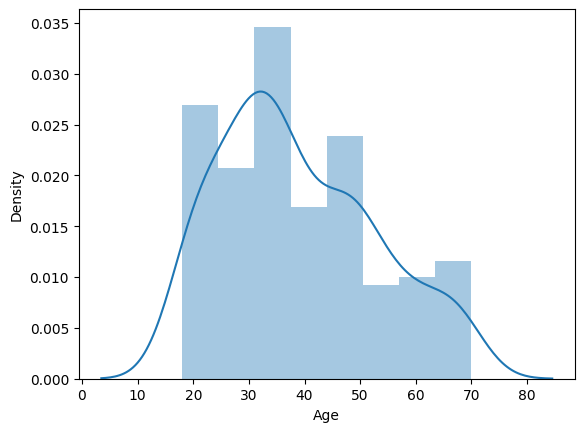

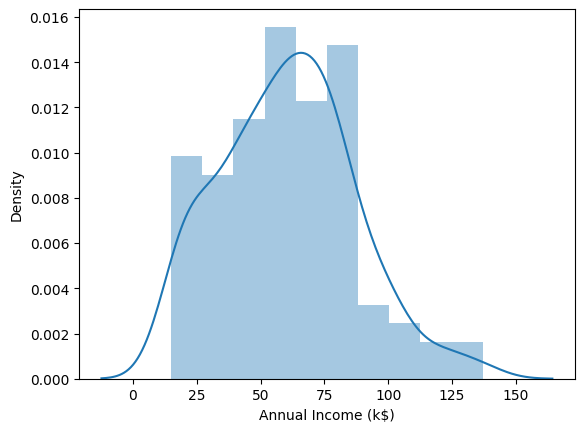

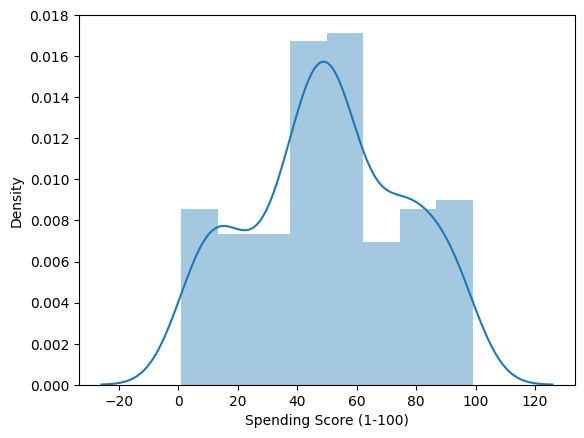

In [7]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

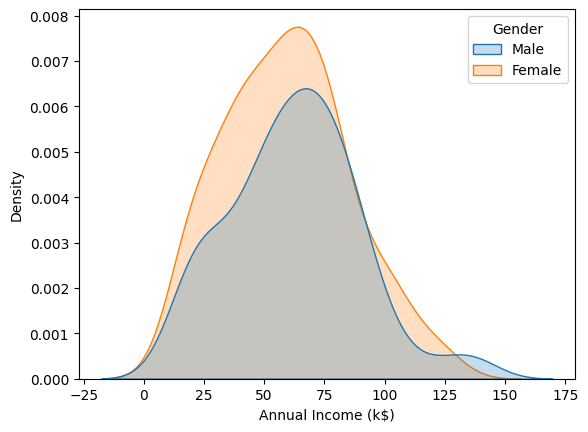

In [8]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender');

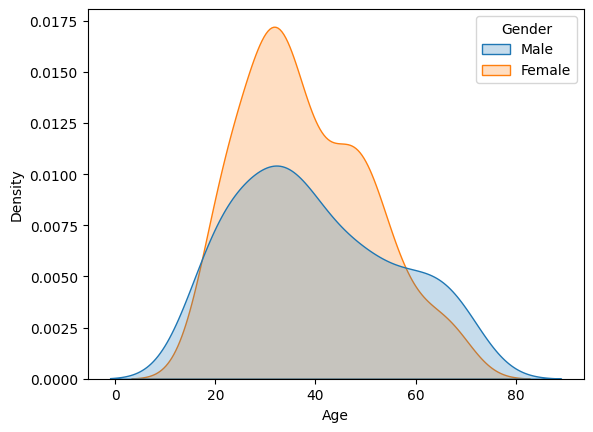

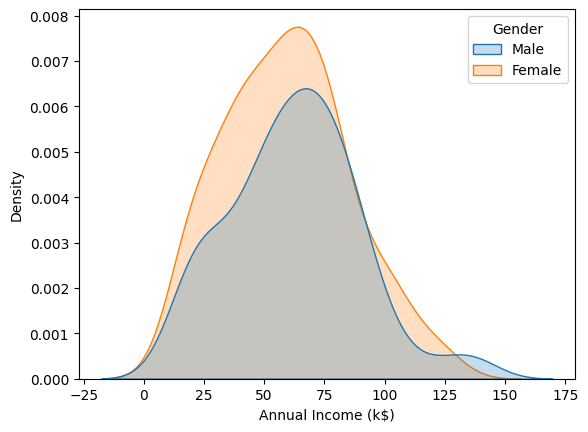

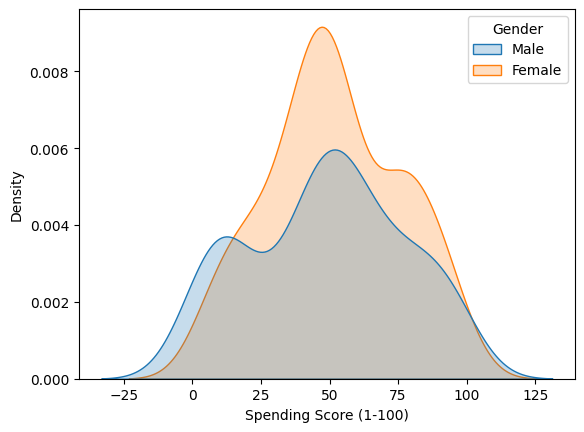

In [9]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(data=df, x=df[i], shade=True, hue='Gender');

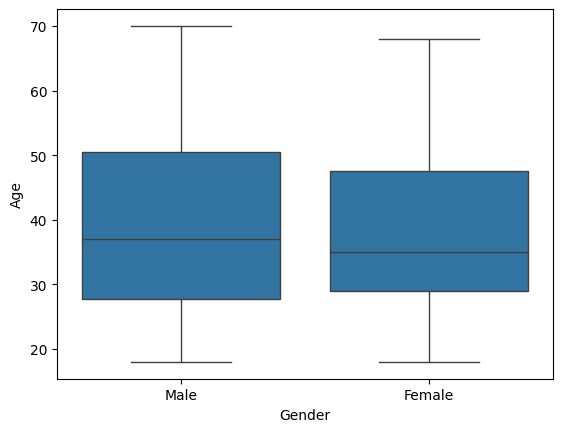

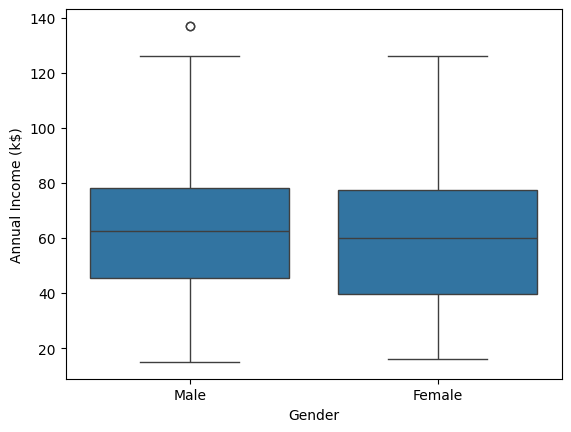

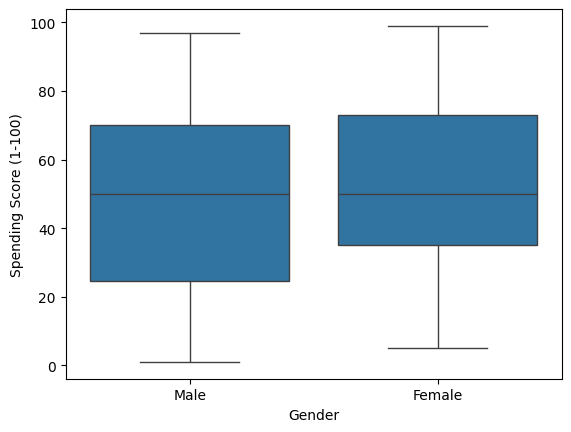

In [10]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df, x='Gender', y=df[i]);

In [11]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


# Bivariate Analysis


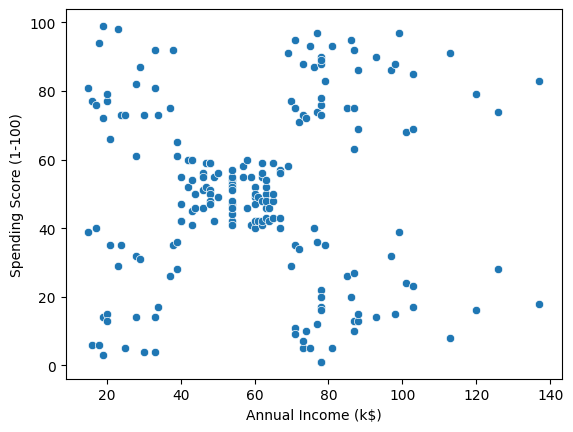

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)');

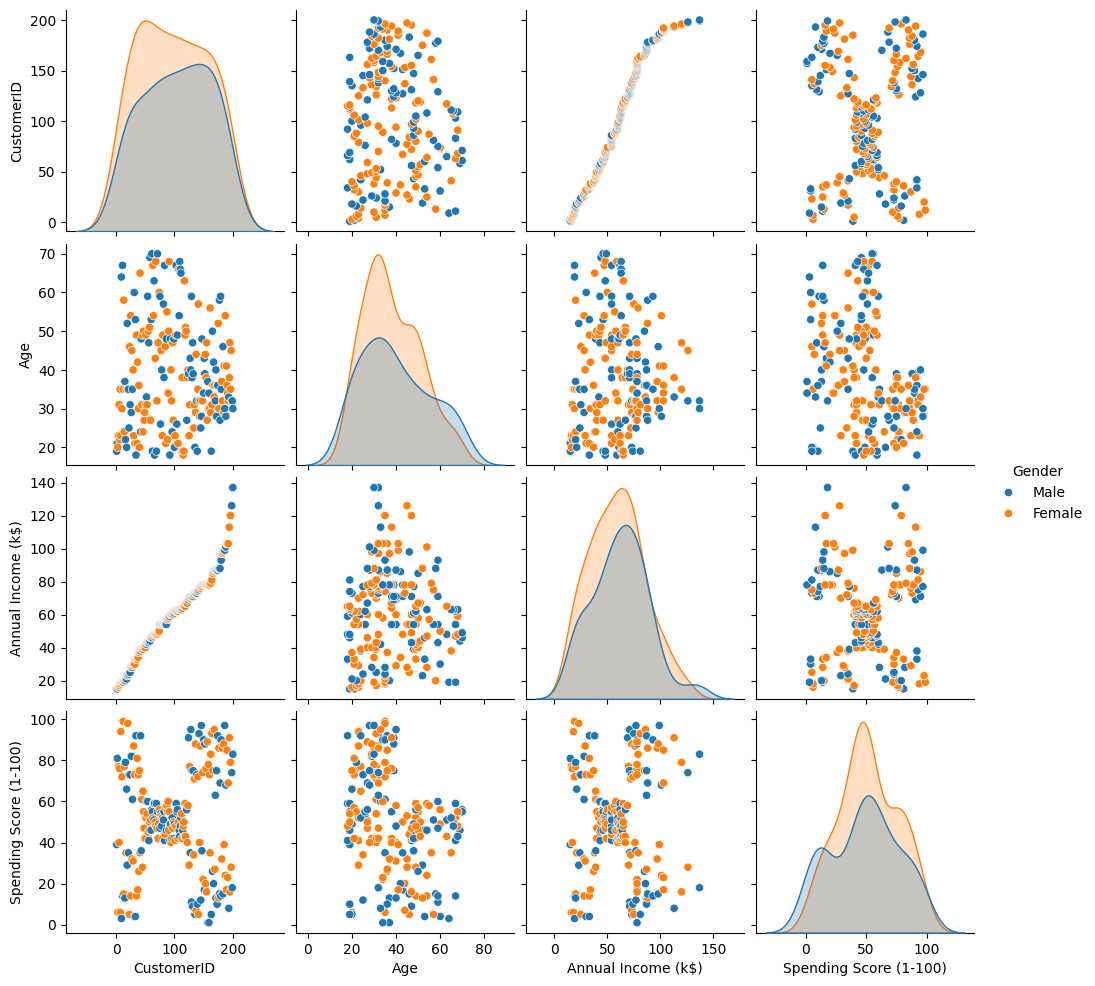

In [13]:
# df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender');

In [14]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


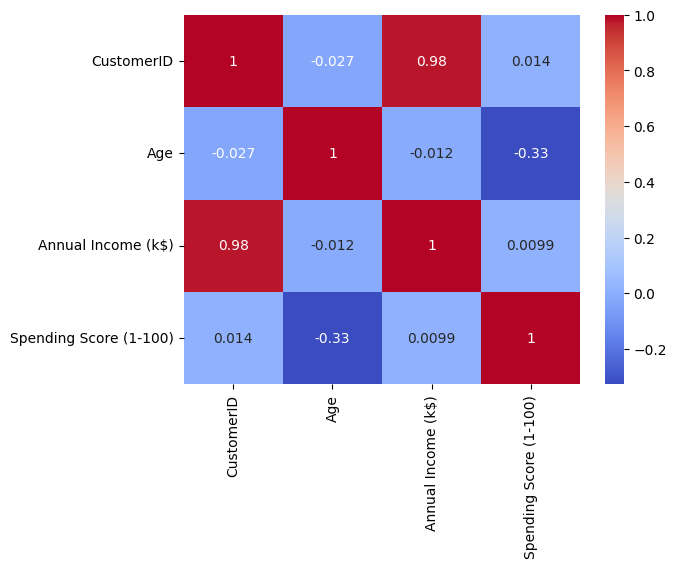

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm');

# K-Means

In [17]:
clustering1=KMeans(n_clusters=6)

In [18]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [19]:
clustering1.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
df["Income cluster"]=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,5
3,4,Female,23,16,77,5
4,5,Female,31,17,40,5


In [21]:
df['Income cluster'].value_counts()

,count
Income cluster,
1,46
0,44
3,42
5,32
4,28
2,8


In [22]:
clustering1.inertia_ #distance between the centroids

5081.484660267269

In [23]:
inertia_score=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_score.append(kmeans.inertia_)

inertia_score

[137277.2800000002,
 49761.737012987025,
 25640.457784396807,
 13556.82927489177,
 8667.679614837503,
 5081.484660267269,
 4237.491459417777,
 2871.629365079367,
 2309.6901709401714,
 1903.2033549783544]

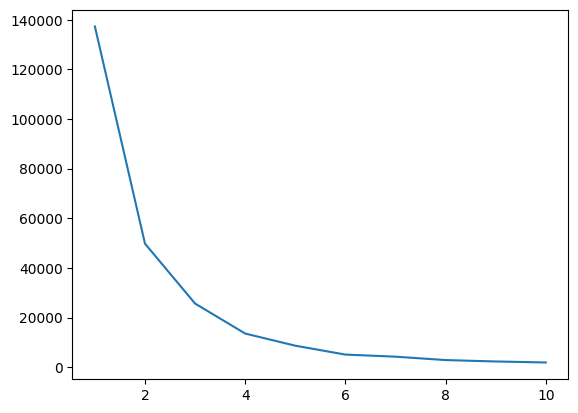

In [24]:
plt.plot(range(1,11),inertia_score)

In [25]:
df.groupby('Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,41.613636,59.454545,49.045455
1,35.956522,74.391304,50.913043
2,36.500000,124.000000,49.625000
3,43.000000,42.238095,50.666667
4,38.214286,93.000000,50.928571
5,34.906250,22.000000,49.656250


# Bivariate clustering

Silhouette score for k=2 is 0.39564531743995546
Silhouette score for k=3 is 0.46761358158775435
Silhouette score for k=4 is 0.4937945814354117
Silhouette score for k=5 is 0.553931997444648
Silhouette score for k=6 is 0.5128405328004378
Silhouette score for k=7 is 0.5017174409749505
Silhouette score for k=8 is 0.4962769338093321
Silhouette score for k=9 is 0.45587414130065596
Silhouette score for k=10 is 0.4426214845978157


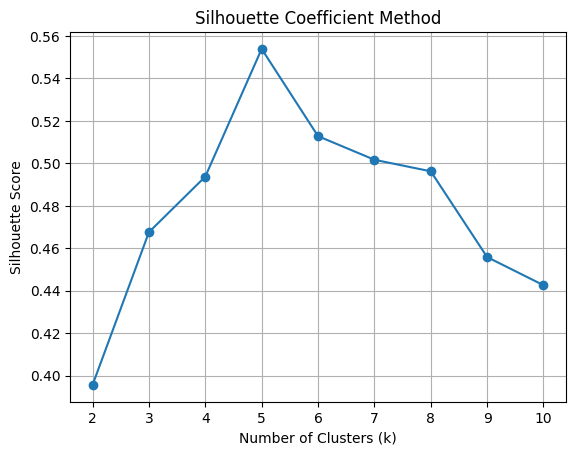

In [53]:
from sklearn.metrics import silhouette_score
X=df[['Annual Income (k$)','Spending Score (1-100)']]

silhouette_scores = []

for k in range(2,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  silhouette_scores.append(silhouette_score(X,kmeans.labels_))
  print(f'Silhouette score for k={k} is {silhouette_score(X,kmeans.labels_)}')

  # Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [48]:
#relation b/w annual income and spending score, elbow method
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,1,Male,19,15,39,5,4
1,2,Male,21,15,81,5,3
2,3,Female,20,16,6,5,4
3,4,Female,23,16,77,5,3
4,5,Female,31,17,40,5,4


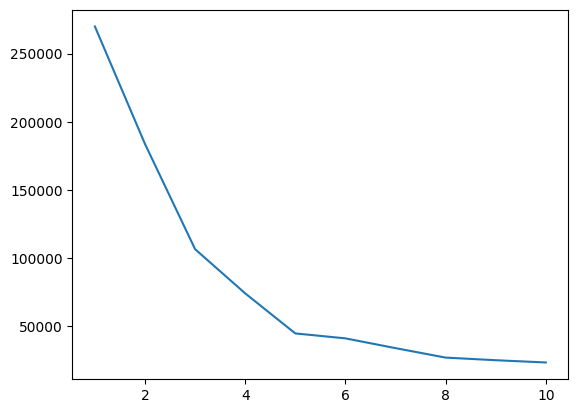

In [49]:
inertia_score2=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_score2.append(kmeans.inertia_)

plt.plot(range(1,11),inertia_score2)

In [58]:
centers=clustering2.cluster_centers_

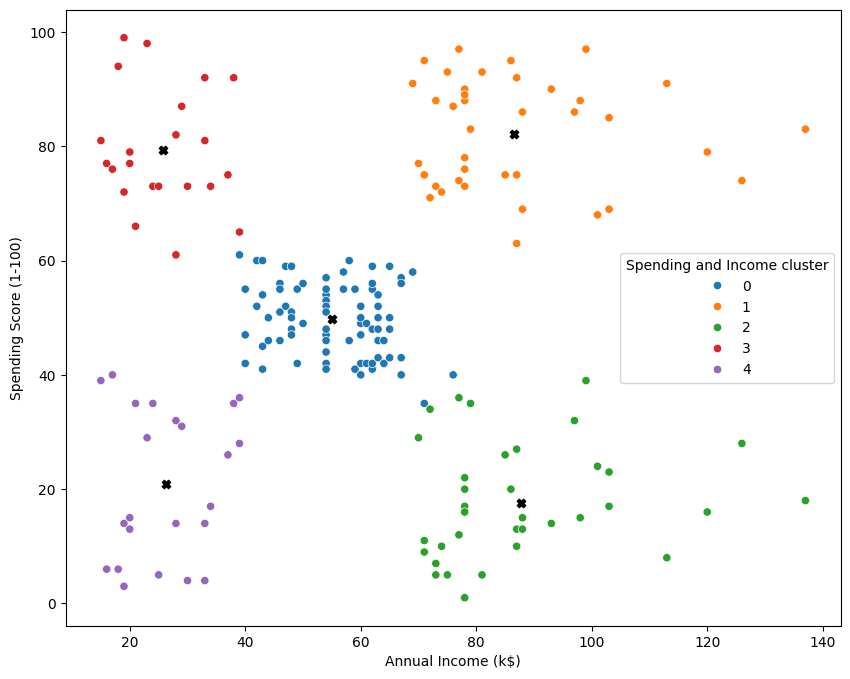

In [83]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income cluster',palette='tab10');
plt.scatter(centers[:,0],centers[:,1],c='black',label='centroids',marker='X')
plt.savefig('Bivariate_clustering.png')

In [64]:
pd.crosstab(df['Spending and Income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.587500,0.412500
1,0.538462,0.461538
2,0.472222,0.527778
3,0.590909,0.409091
4,0.608696,0.391304


In [65]:
df.groupby('Spending and Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,42.937500,55.087500,49.712500
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# Multivariate clustering

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,1,Male,19,15,39,5,4
1,2,Male,21,15,81,5,3
2,3,Female,20,16,6,5,4
3,4,Female,23,16,77,5,3
4,5,Female,31,17,40,5,4


In [71]:
#one-hot encoding
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster,Gender_Male
0,1,19,15,39,5,4,True
1,2,21,15,81,5,3,True
2,3,20,16,6,5,4,False
3,4,23,16,77,5,3,False
4,5,31,17,40,5,4,False


In [72]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [74]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [81]:
dff=pd.DataFrame(scaler.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


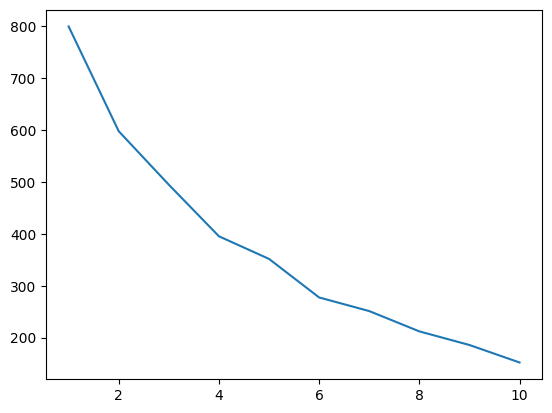

In [79]:
inertia_score3=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(dff)
  inertia_score3.append(kmeans.inertia_)

plt.plot(range(1,11),inertia_score3)

In [82]:
df.to_csv('Clustering.csv')